# 1.Logistic Regression

In [1]:
import pandas as pd
import os

In [2]:
os.chdir('D:\\R Studio')

In [3]:
data=pd.read_excel('Pumpkin_Seeds_Dataset.xlsx')

In [4]:
data.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB
None
                Area    Perimeter  Major_Axis_Length  Minor_Axis_Length  \
count    2500.000000  2500.0

In [7]:
categorical_columns = data.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])


In [8]:
#Assuming 'Class' is the target variable
target = 'Class'
predictors = [col for col in data.columns if col != target]

In [9]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data[predictors], data[target], test_size=0.3, random_state=42)

In [10]:
# Fit the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [11]:
# Predict on the test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


In [12]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Print the model coefficients
coef_df = pd.DataFrame({'Variable': X_train.columns, 'Coefficient': model.coef_[0]})
print(coef_df)

             Variable  Coefficient
0                Area     0.001686
1           Perimeter    -0.000570
2   Major_Axis_Length     0.056815
3   Minor_Axis_Length    -0.073879
4         Convex_Area    -0.001644
5      Equiv_Diameter    -0.033031
6        Eccentricity    -0.000041
7            Solidity    -0.000196
8              Extent    -0.000197
9           Roundness    -0.000318
10      Aspect_Ration     0.000529
11        Compactness    -0.000298


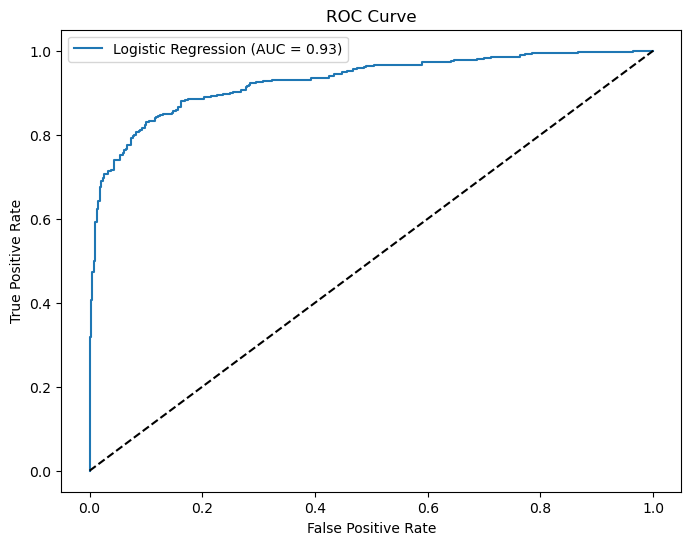

In [13]:
# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

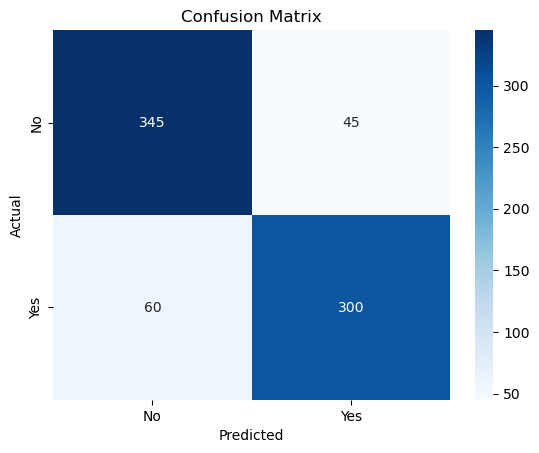

In [14]:
# Display the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Decision Tree

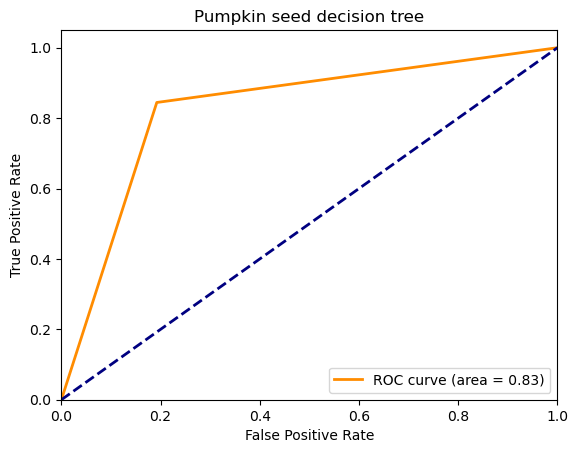

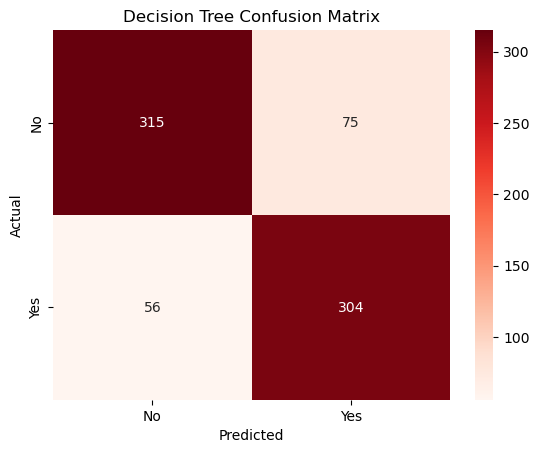

In [36]:
from sklearn.tree import DecisionTreeClassifier

# Fit the decision tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred_tree = tree_model.predict(X_test)
y_prob_tree = tree_model.predict_proba(X_test)[:, 1]

# Evaluate the model
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
roc_auc_tree = roc_auc_score(y_test, y_prob_tree)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming y_test and y_scores are your ground truth labels and predicted scores
fpr, tpr, thresholds = roc_curve(y_test, y_pred_tree)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Pumpkin seed decision tree')
plt.legend(loc="lower right")
plt.show()


# Display the confusion matrix
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Reds', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

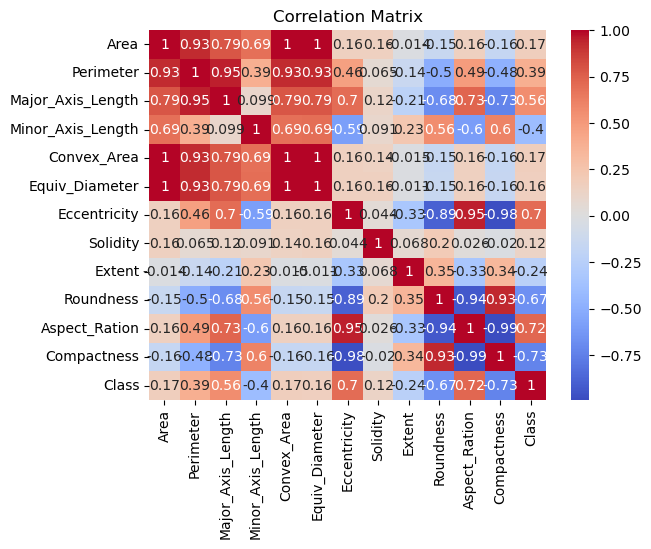

In [16]:
# Check for multicollinearity
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 2.Probit Regression

In [17]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Probit

In [18]:
df=pd.read_csv('NSSO68.csv')

C:\Users\SAMPREETH\AppData\Local\Temp\ipykernel_19940\4037882535.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('NSSO68.csv')


In [19]:
print(df.head())

   slno                                 grp  Round_Centre  FSU_number  Round  \
0     1  40999999999999992652495293775872.0             1       41000     68   
1     2  40999999999999992652495293775872.0             1       41000     68   
2     3  40999999999999992652495293775872.0             1       41000     68   
3     4  40999999999999992652495293775872.0             1       41000     68   
4     5  40999999999999992652495293775872.0             1       41000     68   

   Schedule_Number  Sample  Sector  state  State_Region  ...  pickle_v  \
0               10       1       2     24           242  ...       0.0   
1               10       1       2     24           242  ...       0.0   
2               10       1       2     24           242  ...       0.0   
3               10       1       2     24           242  ...       0.0   
4               10       1       2     24           242  ...       0.0   

   sauce_jam_v  Othrprocessed_v  Beveragestotal_v  foodtotal_v  foodtotal_

In [20]:
#Subset the data
subset_df = df[['chicken_q', 'Age', 'Marital_Status', 'Education']]

# Check for missing values
print(subset_df['chicken_q'].isna().sum())
print(subset_df['Age'].isna().sum())
print(subset_df['Marital_Status'].isna().sum())
print(subset_df['Education'].isna().sum())

0
0
2
7


In [21]:
# Function to impute missing values with mean
def impute_with_mean(df, columns):
    for col in columns:
        df[col].fillna(df[col].mean(), inplace=True)
    return df

# Columns to impute
columns_to_impute = ['Education', 'chicken_q', 'Age', 'Marital_Status']

# Impute missing values with mean in the subset data
subset_df = impute_with_mean(subset_df, columns_to_impute)

# Ensure no infinite values
subset_df = subset_df.replace([np.inf, -np.inf], np.nan)

# Drop rows with any remaining NaN values
subset_df.dropna(inplace=True)

C:\Users\SAMPREETH\AppData\Local\Temp\ipykernel_19940\484558248.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(df[col].mean(), inplace=True)


In [22]:
# Check for missing values
print(subset_df['chicken_q'].isna().sum())
print(subset_df['Age'].isna().sum())
print(subset_df['Marital_Status'].isna().sum())
print(subset_df['Education'].isna().sum())

0
0
0
0


In [25]:
import warnings
from statsmodels.tools.sm_exceptions import PerfectSeparationWarning
from statsmodels.tools.sm_exceptions import ConvergenceWarning

# Suppress PerfectSeparationWarning
warnings.filterwarnings('ignore', category=PerfectSeparationWarning)

# Suppress ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)

# Convert the target variable to binary based on the specified condition
subset_df['chicken_q'] = subset_df['chicken_q'].apply(lambda x: 0 if x < 1 else 1)

# Define the independent variables (example columns, update based on your dataset)
# Assuming 'Age', 'Income', 'Education' are some of the features in the dataset
independent_vars = ['Age', 'Marital_Status', 'Education']


# Add a constant term for the intercept
X = sm.add_constant(subset_df[independent_vars])


# Define the dependent variable
y = subset_df['chicken_q']


# Fit the probit regression model
probit_model = Probit(y, X).fit()


# Print the summary of the model
print(probit_model.summary())


# Make predictions
subset_df['predicted'] = probit_model.predict(X)


# Display the first few rows with the predictions
print(df.head())

Optimization terminated successfully.
         Current function value: 0.115600
         Iterations 7
                          Probit Regression Results                           
Dep. Variable:              chicken_q   No. Observations:               101662
Model:                         Probit   Df Residuals:                   101658
Method:                           MLE   Df Model:                            3
Date:                Mon, 01 Jul 2024   Pseudo R-squ.:                 0.01405
Time:                        23:06:23   Log-Likelihood:                -11752.
converged:                       True   LL-Null:                       -11920.
Covariance Type:            nonrobust   LLR p-value:                 2.615e-72
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.2494      0.054    -41.604      0.000      -2.355      -2.143
Age              

# 3.Tobit regression

In [38]:
# Load the data
data = pd.read_csv('NSSO68.csv', low_memory=False)

# Subset data for state 'KA'
df = data[['MPCE_URP','Whether_owns_any_land', 'hhdsz', 'Religion','Social_Group','Regular_salary_earner']]

# Check for missing values
print(df['MPCE_URP'].isna().sum())
print(df['Whether_owns_any_land'].isna().sum())
print(df['hhdsz'].isna().sum())
print(df['Religion'].isna().sum())
print(df['Social_Group'].isna().sum())
print(df['Regular_salary_earner'].isna().sum())

0
10
0
3
14
12


In [39]:
# Columns to impute
columns_to_impute = ['Whether_owns_any_land','Religion','Social_Group','Regular_salary_earner']

In [40]:
# Drop rows with any remaining NaN values
df.dropna(inplace=True)

C:\Users\SAMPREETH\AppData\Local\Temp\ipykernel_19940\1461368480.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [41]:
# Check for missing values
print(df['MPCE_URP'].isna().sum())
print(df['Whether_owns_any_land'].isna().sum())
print(df['hhdsz'].isna().sum())
print(df['Religion'].isna().sum())
print(df['Social_Group'].isna().sum())
print(df['Regular_salary_earner'].isna().sum())

0
0
0
0
0
0


In [42]:
# Convert the target variable to binary based on the specified condition
df['MPCE_URP'] = df['MPCE_URP'].apply(lambda x: 0 if x < 380 else 1)

C:\Users\SAMPREETH\AppData\Local\Temp\ipykernel_19940\2092469563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MPCE_URP'] = df['MPCE_URP'].apply(lambda x: 0 if x < 380 else 1)


In [43]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel

# Define the independent variables (X) and the dependent variable (y)
X = df[['Whether_owns_any_land', 'hhdsz', 'Religion','Social_Group','Regular_salary_earner']]  # replace with your actual column names
y = df['MPCE_URP']  # replace with your actual column name

# Add a constant term for the intercept
X = sm.add_constant(X)

# Define the Tobit model class
class Tobit(GenericLikelihoodModel):
    def __init__(self, endog, exog, left=0, right=np.inf, **kwargs):
        super(Tobit, self).__init__(endog, exog, **kwargs)
        self.left, self.right = left, right
    
    def nloglikeobs(self, params):
        exog = self.exog
        endog = self.endog
        left, right = self.left, self.right
        
        beta = params[:-1]
        sigma = params[-1]
        
        XB = np.dot(exog, beta)
        cens = (endog == left) * (left != -np.inf) + (endog == right) * (right != np.inf)
        uncens = 1 - cens
        
        ll = np.zeros(len(endog))
        
        ll[cens] = np.log(
            (1 / (np.sqrt(2 * np.pi) * sigma)) *
            np.exp(-((endog[cens] - XB[cens]) ** 2) / (2 * sigma ** 2))
        )
        
        ll[uncens] = np.log(
            (1 / (np.sqrt(2 * np.pi) * sigma)) *
            np.exp(-((endog[uncens] - XB[uncens]) ** 2) / (2 * sigma ** 2))
        )
        
        return -ll

    def fit(self, start_params=None, maxiter=10000, maxfun=5000, **kwargs):
        if start_params is None:
            start_params = np.append(np.zeros(self.exog.shape[1]), 1)
        return super(Tobit, self).fit(start_params=start_params,
                                     maxiter=maxiter, maxfun=maxfun, **kwargs)

# Fit the Tobit model
tobit_model = Tobit(y, X)
tobit_results = tobit_model.fit()

# Print the summary of the model
print(tobit_results.summary())

C:\Users\SAMPREETH\AppData\Local\Temp\ipykernel_19940\3426349089.py:33: RuntimeWarning: invalid value encountered in log
  ll[cens] = np.log(
C:\Users\SAMPREETH\AppData\Local\Temp\ipykernel_19940\3426349089.py:38: RuntimeWarning: invalid value encountered in log
  ll[uncens] = np.log(
C:\Users\SAMPREETH\AppData\Local\Temp\ipykernel_19940\3426349089.py:38: RuntimeWarning: divide by zero encountered in log
  ll[uncens] = np.log(


Optimization terminated successfully.
         Current function value: -0.003281
         Iterations: 223
         Function evaluations: 362
                                Tobit Results                                 
Dep. Variable:               MPCE_URP   Log-Likelihood:                 333.38
Model:                          Tobit   AIC:                            -652.8
Method:            Maximum Likelihood   BIC:                            -586.1
Date:                Tue, 02 Jul 2024                                         
Time:                        00:21:00                                         
No. Observations:              101624                                         
Df Residuals:                  101618                                         
Df Model:                           5                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------

C:\Users\SAMPREETH\anaconda3\Lib\site-packages\statsmodels\base\model.py:2742: UserWarning: df_model + k_constant + k_extra differs from k_params
  warnings.warn("df_model + k_constant + k_extra "
C:\Users\SAMPREETH\anaconda3\Lib\site-packages\statsmodels\base\model.py:2746: UserWarning: df_resid differs from nobs - k_params
  warnings.warn("df_resid differs from nobs - k_params")
